# __Introduction__

__Predicting Customer Purchase Behavior in Black Friday Sales__

In today’s fast-paced retail environment, understanding customer purchase behavior is crucial for businesses to optimize their marketing strategies and improve sales. This project focuses on building a predictive model to estimate the purchase amounts of customers during Black Friday sales, based on demographic and product-related features.  

The dataset, provided by ABC Private Limited, contains transaction records of customers, including details such as age, gender, occupation, marital status, city category, and product information. By leveraging machine learning techniques, we aim to develop an accurate model that can predict purchase amounts and help businesses create personalized offers and targeted promotions.  

We will experiment with multiple regression models, including Linear Regression, Random Forest, XGBoost, and LightGBM, to identify the most effective approach. Feature engineering techniques, such as encoding categorical variables and handling missing values, will be applied to improve model performance.  

This Exploratory Data Analysis will provide valuable insights into customer spending habits, enabling retailers to refine their sales strategies and enhance the overall shopping experience.

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [339]:
!pip install opendatasets

In [340]:
import opendatasets as od

In [341]:
od.download("https://www.kaggle.com/datasets/pranavuikey/black-friday-sales-eda")

Skipping, found downloaded files in ".\black-friday-sales-eda" (use force=True to force download)


In [342]:
df=pd.read_csv("black-friday-sales-eda/train.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [344]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [345]:
df.duplicated().sum()  # Count duplicate rows  

0

Product_Category_3 and Product_Category_2 have ~31% and 70% null values, we'll fill them with their modes and check their correlation with the target variable.

In [350]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0], inplace=True)
df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0], inplace=True)

# __Data Visualization & Optimization__

<Axes: >

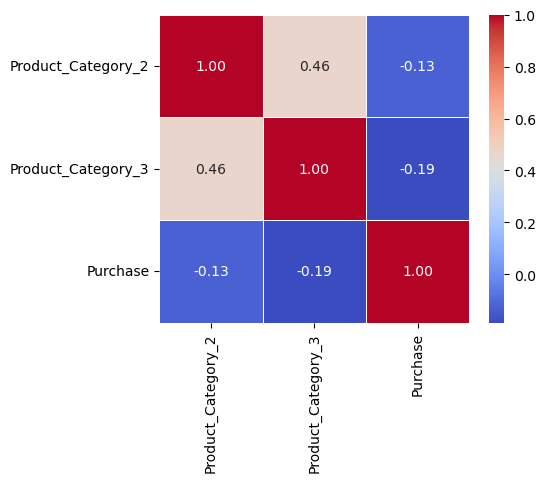

In [353]:
comp=df[['Product_Category_2','Product_Category_3', 'Purchase']].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(comp, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

**The correlation between the target variable and columns 'Product_Category_2' and 'Product_Category_3' can be seen to be very weak.**

In [361]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,8.0,16.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,8.0,16.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,8.0,16.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,8.0,16.0,365


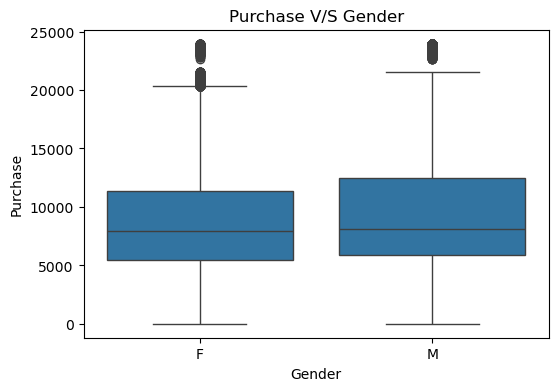

In [363]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.title("Purchase V/S Gender")
plt.show()

**The boxplot shows that both men and women spend about the same on average. While men's spending varies a bit more, there's no stark difference in each gender's typical spending.**

In [365]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].replace("4+", "4").astype(int)

In [366]:
columns=["Occupation","Stay_In_Current_City_Years","Marital_Status","Product_Category_1"]
df[columns] = df[columns].apply(pd.to_numeric, errors="coerce")
df["Purchase_Category"] = pd.qcut(df["Purchase"], q=4, labels=["Low", "Medium", "High", "Very High"])
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
Purchase_Category             0
dtype: int64

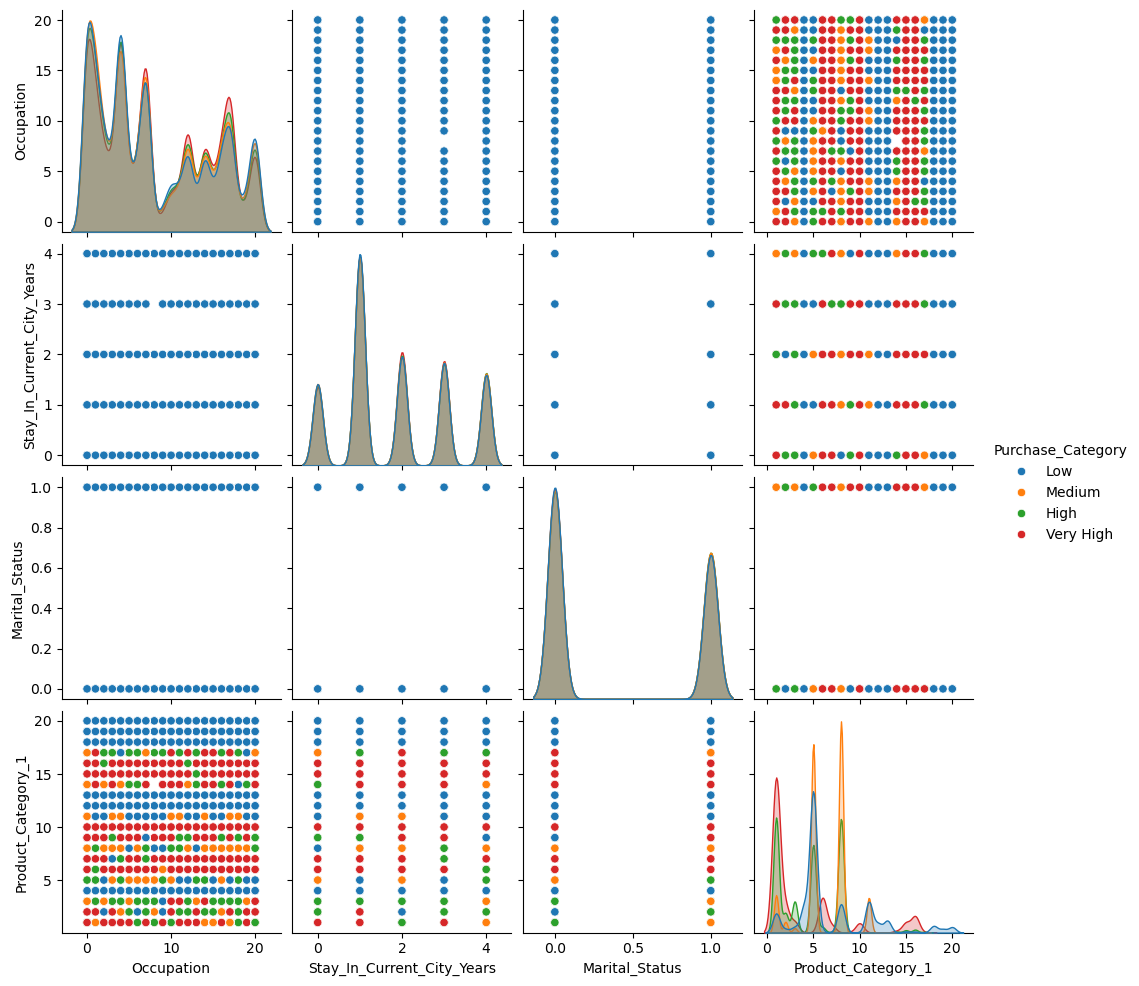

In [369]:
sns.pairplot(df, vars=columns, hue="Purchase_Category")
plt.show()

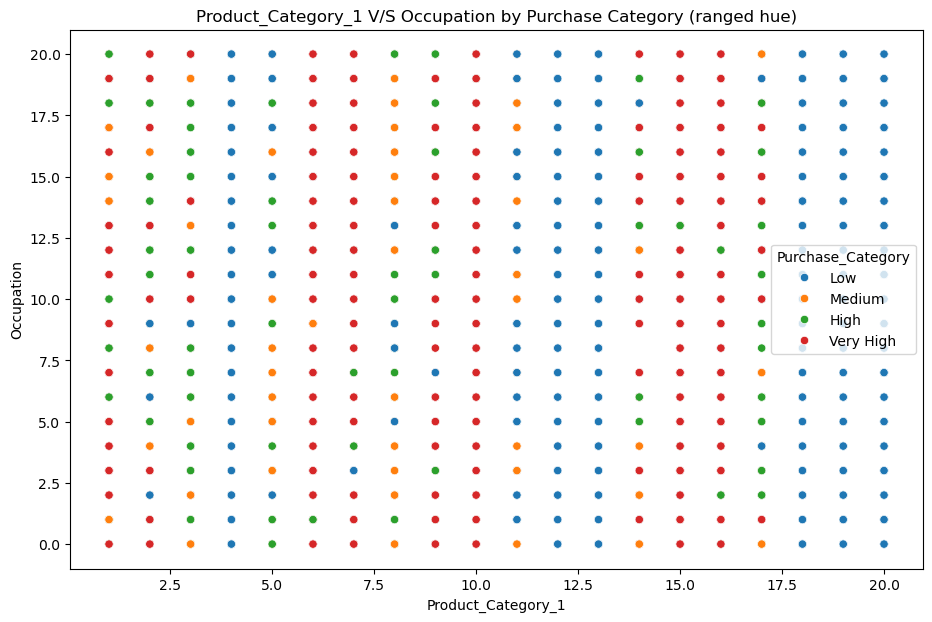

In [372]:
plt.figure(figsize=(11, 7))
sns.scatterplot(x='Product_Category_1', y='Occupation', hue='Purchase_Category', data=df)
plt.title("Product_Category_1 V/S Occupation by Purchase Category (ranged hue)")
plt.show()

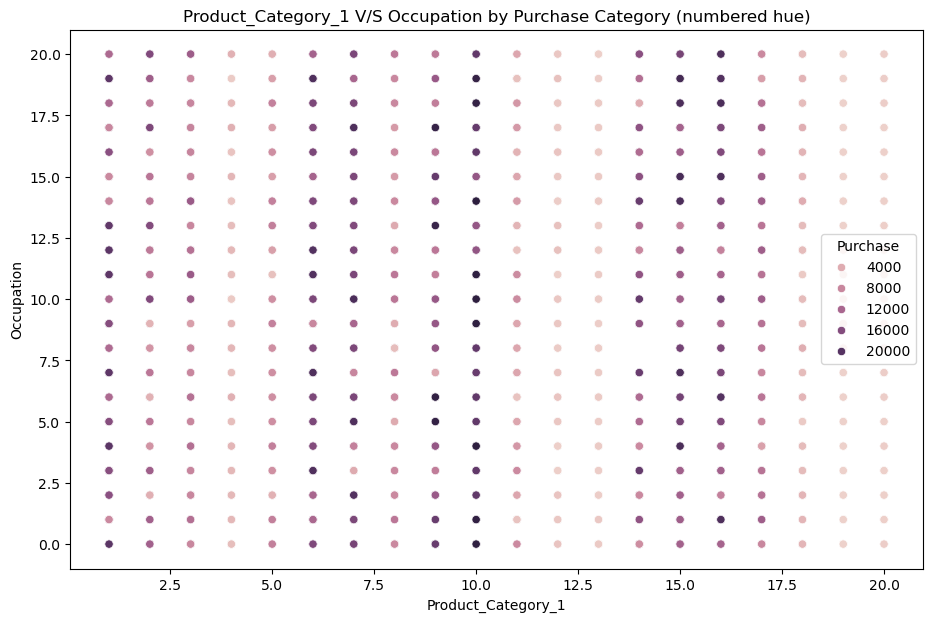

In [373]:
plt.figure(figsize=(11, 7))
sns.scatterplot(x='Product_Category_1', y='Occupation', hue='Purchase', data=df)
plt.title("Product_Category_1 V/S Occupation by Purchase Category (numbered hue)")
plt.show()

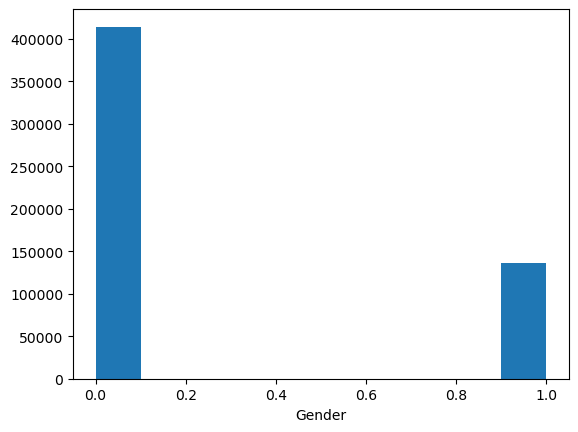

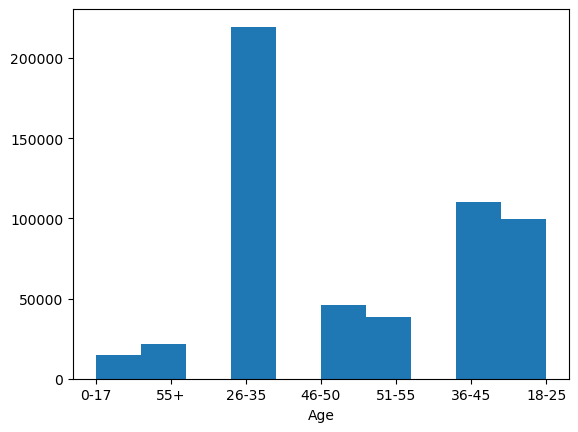

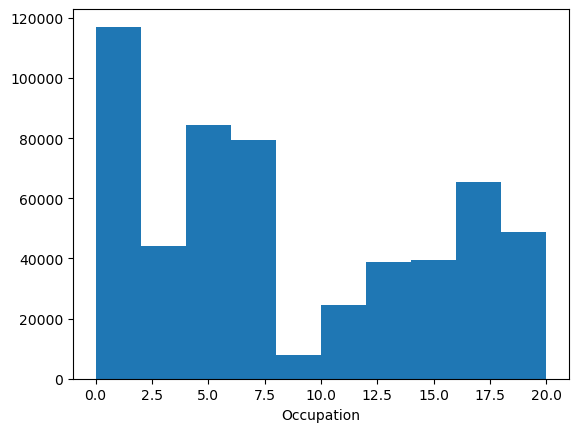

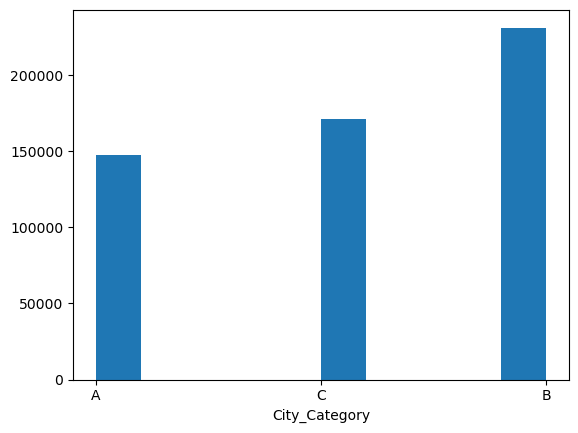

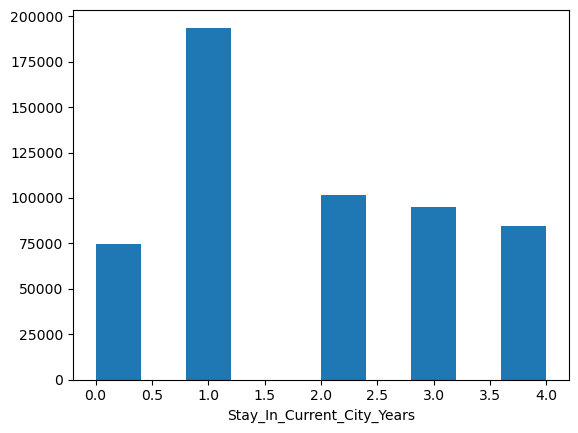

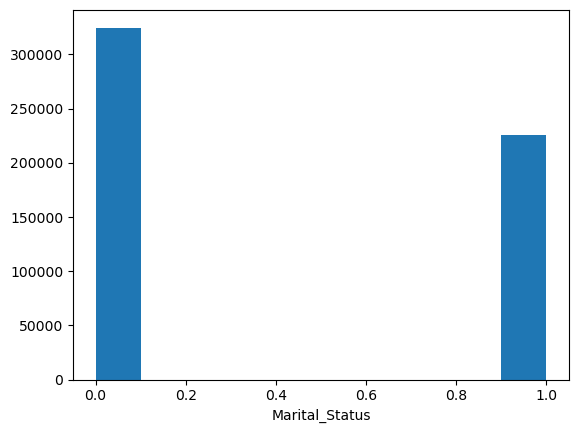

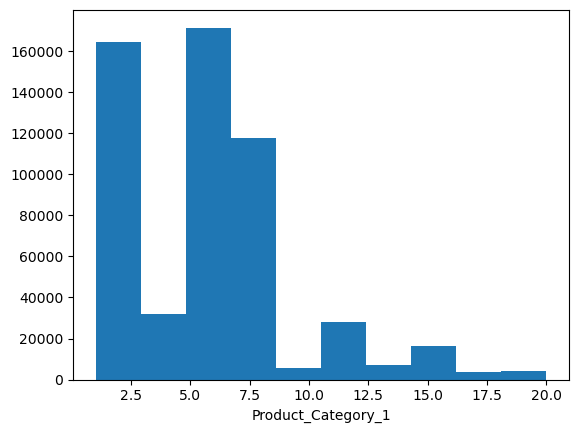

In [374]:
columns=['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1']
for column in columns:
    plt.xlabel(column)
    if(column=='Gender'):
        plt.hist(df[column].map({'M': 0, 'F': 1}))
    else:
        plt.hist(df[column])
    plt.show()

In [376]:
df.drop(['User_ID','Product_ID','Age','Purchase_Category'], axis=1, inplace=True)
df

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Encoded
0,0,10,0,2,0,3,8.0,16.0,8370,8.5
1,0,10,0,2,0,1,6.0,14.0,15200,8.5
2,0,10,0,2,0,12,8.0,16.0,1422,8.5
3,0,10,0,2,0,12,14.0,16.0,1057,8.5
4,1,16,2,4,0,8,8.0,16.0,7969,60.0
...,...,...,...,...,...,...,...,...,...,...
550063,1,13,1,1,1,20,8.0,16.0,368,53.0
550064,0,1,2,3,0,20,8.0,16.0,371,30.5
550065,0,15,1,4,1,20,8.0,16.0,137,30.5
550066,0,1,2,2,0,20,8.0,16.0,365,60.0


__Label Encoding__

In [375]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
lists=['Gender','City_Category']
for k in lists:
    d = LabelEncoder()
    df[k] = d.fit_transform(df[k].astype(str))
    label_encoders[k] = d

age_mapping = { '0-17': 8.5, '18-25': 21.5, '26-35': 30.5, '36-45': 40.5, '46-50': 48, '51-55': 53, '55+': 60}

if 'Age' in df.columns:
    df['Age_Encoded'] = df['Age'].map(age_mapping) 
df    

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase_Category,Age_Encoded
0,1000001,P00069042,0,0-17,10,0,2,0,3,8.0,16.0,8370,High,8.5
1,1000001,P00248942,0,0-17,10,0,2,0,1,6.0,14.0,15200,Very High,8.5
2,1000001,P00087842,0,0-17,10,0,2,0,12,8.0,16.0,1422,Low,8.5
3,1000001,P00085442,0,0-17,10,0,2,0,12,14.0,16.0,1057,Low,8.5
4,1000002,P00285442,1,55+,16,2,4,0,8,8.0,16.0,7969,Medium,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,51-55,13,1,1,1,20,8.0,16.0,368,Low,53.0
550064,1006035,P00375436,0,26-35,1,2,3,0,20,8.0,16.0,371,Low,30.5
550065,1006036,P00375436,0,26-35,15,1,4,1,20,8.0,16.0,137,Low,30.5
550066,1006038,P00375436,0,55+,1,2,2,0,20,8.0,16.0,365,Low,60.0


__Data Splitting__

In [377]:
from sklearn.model_selection import train_test_split
X = df[['Gender', 'Age_Encoded', 'Occupation', 'Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']]
y = df['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

__Dataset Standardization__

In [378]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training the Model

__LinearRegression__

In [379]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [380]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [381]:
mean_absolute_error(y_test,y_pred)

3579.7446842897652

In [382]:
r2_score(y_test,y_pred)

0.1273222581174046

__RandomForest__

In [383]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [384]:
mean_absolute_error(y_test,y_pred)

2245.387222757408

In [385]:
r2_score(y_test,y_pred)

0.6268861999580038

__XGB__

In [386]:
!pip install xgboost

In [387]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=30,
    subsample=0.5,
    colsample_bytree=0.8, 
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [388]:
mean_absolute_error(y_test,y_pred)

2181.796684055409

In [389]:
r2_score(y_test,y_pred)

0.656718373298645

__LGBM__

In [390]:
!pip install lightgbm

In [391]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=10,
    random_state=42
)
model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97
[LightGBM] [Info] Number of data points in the train set: 440054, number of used features: 8
[LightGBM] [Info] Start training from score 9266.733955


LGBMRegressor(learning_rate=0.01, max_depth=10, n_estimators=500,
              random_state=42)

In [392]:
mean_absolute_error(y_test,y_pred)

2181.796684055409

In [393]:
r2_score(y_test,y_pred)

0.656718373298645

# Conclusion

#### This project analyzed Black Friday sales data to understand customer purchase behavior. Through EDA and feature optimization, we identified key trends in demographics, product categories, and spending patterns. Various regression models were tested, with the best achieving an R² score of ~64-65%. Further improvements could be made by refining features and optimizing model parameters. These insights can help businesses create personalized marketing strategies and enhance sales performance.